In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (20, 6)})

In [5]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [6]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [7]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [8]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [9]:
submissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509104 entries, 0 to 509103
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   step_id            509104 non-null  int64 
 1   timestamp          509104 non-null  int64 
 2   submission_status  509104 non-null  object
 3   user_id            509104 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 15.5+ MB


In [11]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')

In [12]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [13]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')

In [14]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [15]:
events_data['day'] = events_data['date'].dt.date
submissions_data['day'] = submissions_data['date'].dt.date

In [16]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [17]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [22]:
user_scores = submissions_data.pivot_table(index='user_id',
                                           columns='submission_status',
                                           values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()

In [23]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [27]:
user_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  9940 non-null   int64
 1   correct  9940 non-null   int64
 2   wrong    9940 non-null   int64
dtypes: int64(3)
memory usage: 233.1 KB


In [81]:
events_gap_data = events_data.groupby('user_id', as_index=False).agg({'day': 'unique'})

In [83]:
events_gap_data.head()

,user_id,day
0,1,[2016-09-02]
1,2,"[2017-12-27, 2018-02-21]"
2,3,"[2015-06-15, 2015-09-03, 2015-09-05, 2015-09-0..."
3,5,"[2016-06-17, 2017-07-12]"
4,7,[2018-03-21]


In [106]:
a = events_gap_data['day'].apply(np.diff).values

In [107]:
a

array([array([], dtype=object),
       array([datetime.timedelta(days=56)], dtype=object),
       array([datetime.timedelta(days=80), datetime.timedelta(days=2),
              datetime.timedelta(days=1), datetime.timedelta(days=32),
              datetime.timedelta(days=2), datetime.timedelta(days=1)],
             dtype=object)                                            ,
       ...,
       array([datetime.timedelta(days=1), datetime.timedelta(days=2),
              datetime.timedelta(days=1), datetime.timedelta(days=16),
              datetime.timedelta(days=166), datetime.timedelta(days=6),
              datetime.timedelta(days=1), datetime.timedelta(days=1)],
             dtype=object)                                             ,
       array([datetime.timedelta(days=18)], dtype=object),
       array([], dtype=object)], dtype=object)

In [108]:
events_gap_data_ser = pd.Series(np.concatenate(a))

In [109]:
events_gap_data_ser

0        56 days
1        80 days
2         2 days
3         1 days
4        32 days
          ...   
97867   166 days
97868     6 days
97869     1 days
97870     1 days
97871    18 days
Length: 97872, dtype: timedelta64[ns]

In [123]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [124]:
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [125]:
len(gap_data)

19234

In [126]:
gap_data = pd.Series(np.concatenate(gap_data))

In [127]:
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [128]:
gap_data = gap_data / (24 * 60 * 60)

In [129]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

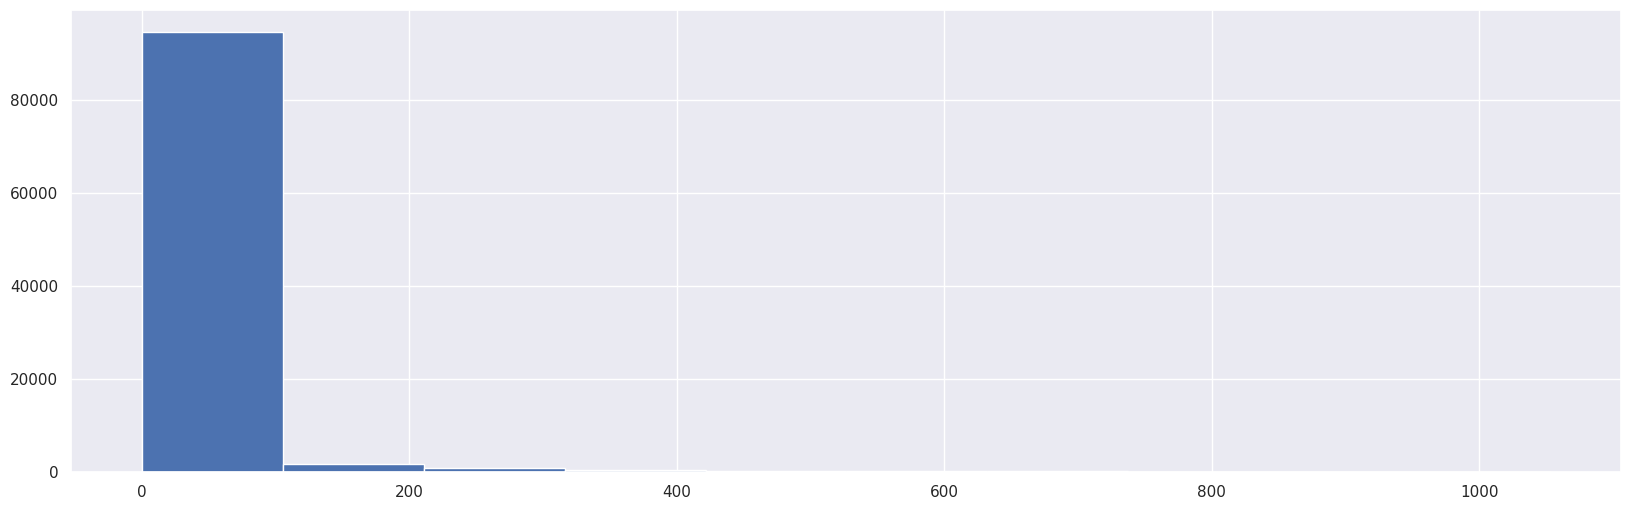

In [130]:
gap_data.hist();

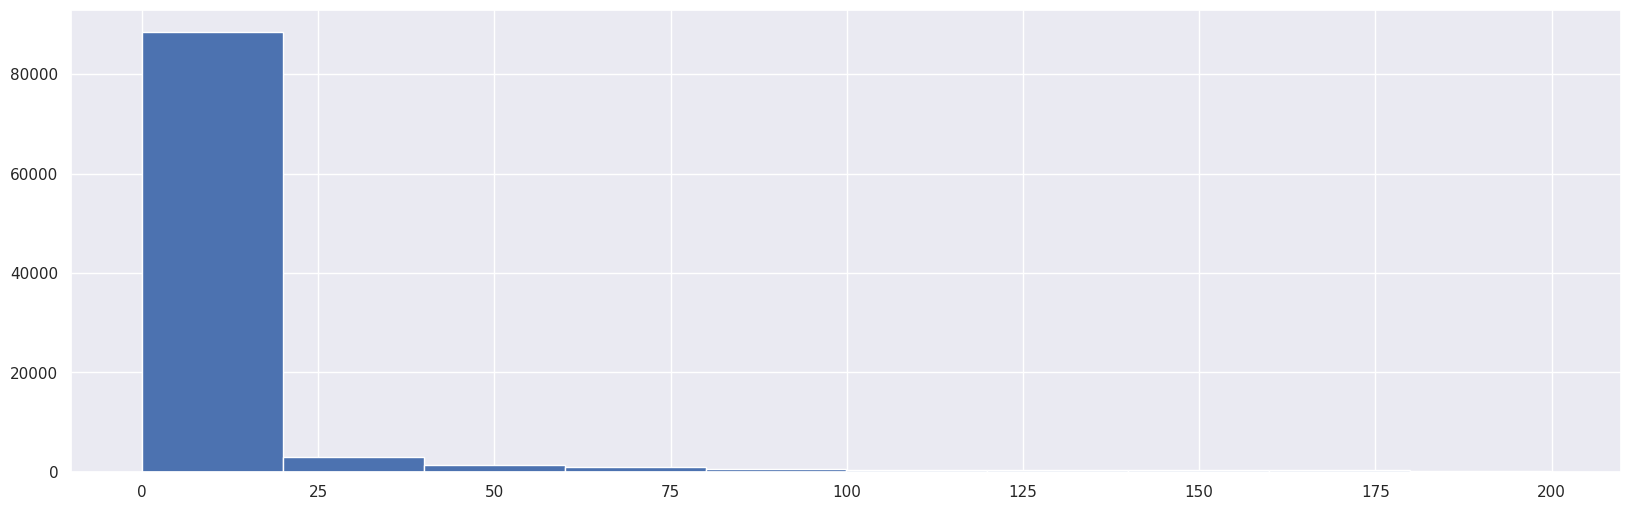

In [158]:
gap_data[gap_data < 200].hist();

In [144]:
gap_data.quantile(0.95)

59.760440972222156

In [140]:
gap_data.quantile(.9)

18.325995370370403

In [142]:
gap_data.quantile(.85)

9.304994791666651

In [164]:
gap_data.quantile(.92)

27.452338425926104